# Airlines Delay
### Airline on-time statistics and delay causes

##### by Muhammad Elkfrawy - Dec 2020

## Preliminary Wrangling

> The U.S. Department of Transportation's (DOT) [Bureau of Transportation Statistics](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp) (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights appear in DOT's monthly [Air Travel Consumer Report](http://www.dot.gov/individuals/air-consumer/air-travel-consumer-reports), published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

***This version of the dataset was compiled from the Statistical Computing Statistical Graphics 2009 Data Expo and is also [available here](http://stat-computing.org/dataexpo/2009/the-data.html) or [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7).***

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# display all columns
pd.set_option('display.max_columns', 500)

In [2]:
# load the datasets
airlines = pd.read_csv('2008.csv')
carriers = pd.read_csv('carriers.csv')

In [3]:
# overview of data shape and composition
print(f'Shape:\n{airlines.shape}\n')
print(f'Dtypes:\n{airlines.dtypes}\n')
airlines.head()

Shape:
(2389217, 29)

Dtypes:
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object



,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU,LIT,393,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU,MCO,848,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


**Variable descriptions:** 
<span>
    <table align="center" width="88%" style="text-align: left">
    <col style="width:2%">
    <col style="width:13%">
    <col style="width:30%">
    <col style="width:55%">
    <tbody><tr>
      <th>#</th>
      <th style="text-align:left">Name</th>
      <th style="text-align:left">Description</th>
      <th style="text-align:left">Notes</th>
    </tr>
    <tr>
     <td style="text-align:left">1  </td><td style="text-align:left"> Year              </td><td style="text-align:left">1987-2008</td>
    </tr><tr>
     <td style="text-align:left">2  </td><td style="text-align:left"> Month             </td><td style="text-align:left">1-12</td>
    </tr><tr>
     <td style="text-align:left">3  </td><td style="text-align:left"> DayofMonth        </td><td style="text-align:left">1-31</td>
    </tr><tr>
     <td style="text-align:left">4  </td><td style="text-align:left"> DayOfWeek         </td><td style="text-align:left">1 (Monday) - 7 (Sunday)</td>
    </tr><tr>
     <td style="text-align:left">5  </td><td style="text-align:left"> DepTime           </td><td style="text-align:left">actual departure time (local, hhmm)</td>
    </tr><tr>
     <td style="text-align:left">6  </td><td style="text-align:left"> CRSDepTime        </td><td style="text-align:left">scheduled departure time (local, hhmm)</td>
    </tr><tr>
     <td style="text-align:left">7  </td ><td style="text-align:left"> ArrTime           </td><td style="text-align:left">actual arrival time (local, hhmm)</td>
    </tr><tr>
     <td style="text-align:left">8  </td><td style="text-align:left"> CRSArrTime        </td><td style="text-align:left">scheduled arrival time (local, hhmm)</td>
    </tr><tr>
     <td style="text-align:left">9  </td><td style="text-align:left"> UniqueCarrier     </td><td style="text-align:left"><a href="http://stat-computing.org/dataexpo/2009/supplemental-data.html">unique carrier code</a></td>
    </tr><tr>
     <td style="text-align:left">10 </td><td style="text-align:left"> FlightNum         </td><td style="text-align:left">flight number</td>
    </tr><tr>
     <td style="text-align:left">11 </td><td style="text-align:left"> TailNum           </td><td style="text-align:left">plane tail number</td>
    </tr><tr>
     <td style="text-align:left">12 </td><td style="text-align:left"> ActualElapsedTime </td><td style="text-align:left">in minutes</td>
    </tr><tr>
     <td style="text-align:left">13 </td><td style="text-align:left"> CRSElapsedTime    </td><td style="text-align:left">in minutes</td>
    </tr><tr>
     <td style="text-align:left">14 </td><td style="text-align:left"> AirTime           </td><td style="text-align:left">in minutes</td>
    </tr><tr>
    <td style="text-align:left">15 </td><td style="text-align:left"> ArrDelay          </td><td style="text-align:left">arrival delay, in minutes</td><td style="text-align:left">A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).</td>
    </tr><tr>
     <td style="text-align:left">16 </td><td style="text-align:left"> DepDelay          </td><td style="text-align:left">departure delay, in minutes</td>
    </tr><tr>
     <td style="text-align:left">17 </td><td style="text-align:left"> Origin            </td><td style="text-align:left">origin <a href="http://stat-computing.org/dataexpo/2009/supplemental-data.html">IATA airport code</a></td>
    </tr><tr>
     <td style="text-align:left">18 </td><td style="text-align:left"> Dest              </td><td style="text-align:left">destination <a href="http://stat-computing.org/dataexpo/2009/supplemental-data.html">IATA airport code</a></td>
    </tr><tr>
     <td style="text-align:left">19 </td><td style="text-align:left"> Distance          </td><td style="text-align:left">in miles</td>
    </tr><tr>
     <td style="text-align:left">20 </td><td style="text-align:left"> TaxiIn            </td><td style="text-align:left">taxi in time, in minutes</td>
    </tr><tr>
     <td style="text-align:left">21 </td><td style="text-align:left"> TaxiOut           </td><td style="text-align:left">taxi out time in minutes</td>
    </tr><tr>
     <td style="text-align:left">22 </td><td style="text-align:left"> Cancelled           </td><td style="text-align:left">was the flight cancelled?</td>
    </tr><tr>
     <td style="text-align:left">23 </td><td style="text-align:left"> CancellationCode  </td><td style="text-align:left">reason for cancellation (A = carrier, B = weather, C = NAS, D = security)</td>
    </tr><tr>
     <td style="text-align:left">24 </td><td style="text-align:left"> Diverted          </td><td style="text-align:left">1 = yes, 0 = no</td>
    </tr><tr>
     <td style="text-align:left">25 </td><td style="text-align:left"> CarrierDelay      </td><td style="text-align:left">in minutes</td><td style="text-align:left">Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.</td>
    </tr><tr>
    <td style="text-align:left">26 </td><td style="text-align:left"> WeatherDelay      </td><td style="text-align:left">in minutes</td><td style="text-align:left">Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.</td>
    </tr><tr>
     <td style="text-align:left">27 </td><td style="text-align:left"> NASDelay          </td><td style="text-align:left">in minutes</td><td style="text-align:left">Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.</td>
    </tr><tr>
     <td style="text-align:left">28 </td><td style="text-align:left"> SecurityDelay     </td><td style="text-align:left">in minutes</td><td style="text-align:left">Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.</td>
    </tr><tr>
     <td style="text-align:left">29 </td><td style="text-align:left"> LateAircraftDelay </td><td style="text-align:left">in minutes</td><td style="text-align:left">Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.</td>
    </tr>
    </tbody></table>
</span>

### The structure of the dataset?

There are arround 2.4 million records in the dataset with 29 features listed above with description. Most variables are numerical with some other categorical variables like `Origin`, `Dest`and `CancellationCode`.

### The main features of interest in the dataset?

- What are the factors effecting the flights cancellation?
- When do airline cancellations happen?
- Are cancellations related to delays?
- Any other interesting patterns may appear.

**But first, Let's make sure our data is clean and ready to go.**

In [4]:
# create full_data col incase we needed it
airlines['full_date'] = pd.to_datetime(dict(year=airlines.Year, month=airlines.Month, day=airlines.DayofMonth))
airlines.sample(5)[['Year','Month','DayofMonth','full_date']]

,Year,Month,DayofMonth,full_date
528046,2008,1,31,2008-01-31
1590438,2008,3,27,2008-03-27
1062625,2008,2,10,2008-02-10
937360,2008,2,25,2008-02-25
1623012,2008,3,17,2008-03-17


In [5]:
# Renaming the numeric values to categorical in columns Cancelled and Diverted 
airlines['Cancelled'] = airlines['Cancelled'].replace([1, 0], ["Cancelled", "Not Cancelled"])
airlines['Diverted'] = airlines['Diverted'].replace([1, 0], ["Diverted", "Not Diverted"])

In [6]:
airlines.dtypes

Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
DepTime                     float64
CRSDepTime                    int64
ArrTime                     float64
CRSArrTime                    int64
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                      float64
TaxiOut                     float64
Cancelled                    object
CancellationCode             object
Diverted                     object
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               

In [7]:
# fixing some data types (numeric to categorical)

# 'Year', 'Month', 'DayofMonth', 'DayOfWeek'
# 'UniqueCarrier', 'FlightNum'
# 'Cancelled', 'CancellationCode', 'Diverted'

airlines[airlines.columns[0:4]] = airlines[airlines.columns[0:4]].astype(object)
airlines[airlines.columns[8:10]] = airlines[airlines.columns[8:10]].astype(object)
airlines[airlines.columns[21:24]] = airlines[airlines.columns[21:24]].astype(object)

In [8]:
# check missing values
airlines.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                64442
CRSDepTime                 0
ArrTime                70096
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime      70096
CRSElapsedTime           407
AirTime                70096
ArrDelay               70096
DepDelay               64442
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 70096
TaxiOut                64442
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay         1804634
WeatherDelay         1804634
NASDelay             1804634
SecurityDelay        1804634
LateAircraftDelay    1804634
full_date                  0
dtype: int64

For missing values imputation. We checked the numerical columns for missing values using the `isnull().sum()` function and imputed them using the linear interpolate function. 

The following columns had missing values which were handled: 
- `DepTime`, `ArrTime` 
- `ActualElapsedTime`, `CRSElapsedTime`
- `AirTime`, `ArrDelay`, `DepDelay`
- `TaxiIn`, `TaxiOut` 
- `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAircraftDelay`.

**For accuracy, we will use interpolation for the columns regarding Dep. and Arr. time on only the delayed flights.**

In [9]:
airlines.query('Cancelled == "Cancelled"').isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime              64442
CRSDepTime               0
ArrTime              64442
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              42449
ActualElapsedTime    64442
CRSElapsedTime         119
AirTime              64442
ArrDelay             64442
DepDelay             64442
Origin                   0
Dest                     0
Distance                 0
TaxiIn               64442
TaxiOut              64442
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         64442
WeatherDelay         64442
NASDelay             64442
SecurityDelay        64442
LateAircraftDelay    64442
full_date                0
dtype: int64

In [10]:
# first, fill null values with 0 in cancelled flights
temp = airlines.copy()
airlines[airlines['Cancelled'] == "Cancelled"] = airlines[airlines['Cancelled'] == "Cancelled"].fillna(0)
airlines['TailNum'] = temp['TailNum']

In [11]:
airlines.query('Cancelled == "Cancelled"').isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum              42449
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay             0
WeatherDelay             0
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
full_date                0
dtype: int64

In [12]:
# Null values imputation using interpolation
airlines['DepTime'] = airlines['DepTime'].interpolate(method='linear', limit_direction='both', axis=0) 
airlines['ArrTime'] = airlines['ArrTime'].interpolate(method='linear', limit_direction='both', axis=0) 

airlines['ActualElapsedTime'] = airlines['ActualElapsedTime'].interpolate(method='linear', limit_direction ='both', axis=0) 
airlines['CRSElapsedTime'] = airlines['CRSElapsedTime'].interpolate(method='linear', limit_direction ='both', axis=0)

airlines['AirTime'] = airlines['AirTime'].interpolate(method='linear', limit_direction ='both', axis=0) 
airlines['ArrDelay'] = airlines['ArrDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
airlines['DepDelay'] = airlines['DepDelay'].interpolate(method='linear', limit_direction ='both', axis=0)

airlines['TaxiIn'] = airlines['TaxiIn'].interpolate(method='linear', limit_direction ='both', axis=0) 
airlines['TaxiOut'] = airlines['TaxiOut'].interpolate(method='linear', limit_direction ='both', axis=0)

airlines['CarrierDelay'] = airlines['CarrierDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
airlines['WeatherDelay'] = airlines['WeatherDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
airlines['NASDelay'] = airlines['NASDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
airlines['SecurityDelay'] = airlines['SecurityDelay'].interpolate(method='linear', limit_direction ='both', axis=0)
airlines['LateAircraftDelay'] = airlines['LateAircraftDelay'].interpolate(method='linear', limit_direction ='both', axis=0)

Resources:
- https://www.w3resource.com/python-exercises/pandas/missing-values/python-pandas-missing-values-exercise-15.php
- https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

In [13]:
airlines.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                42452
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     2324775
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
full_date                  0
dtype: int64

In [14]:
# descriptive statistics
airlines.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06
mean,1.303875e+03,1.329992e+03,1.445508e+03,1.496744e+03,1.251720e+02,1.293690e+02,1.022886e+02,1.001892e+01,1.112790e+01,7.261589e+02,6.655664e+00,1.623579e+01,1.457149e+01,2.145398e+00,1.255730e+01,8.002057e-02,1.702928e+01
std,5.211195e+02,4.657833e+02,5.560192e+02,4.845238e+02,7.237032e+01,6.948389e+01,6.888987e+01,3.913477e+01,3.608385e+01,5.571763e+02,4.906358e+00,1.121008e+01,3.317958e+01,1.428656e+01,2.254845e+01,1.539827e+00,2.983227e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-2.500000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.100000e+02,9.270000e+02,1.049000e+03,1.115000e+03,7.500000e+01,8.000000e+01,5.400000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.318000e+03,1.325000e+03,1.502000e+03,1.520000e+03,1.090000e+02,1.110000e+02,8.500000e+01,0.000000e+00,0.000000e+00,5.830000e+02,6.000000e+00,1.400000e+01,2.750000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.000000e+00
75%,1.726000e+03,1.720000e+03,1.906000e+03,1.910000e+03,1.580000e+02,1.600000e+02,1.330000e+02,1.400000e+01,1.000000e+01,9.570000e+02,8.000000e+00,1.900000e+01,1.634615e+01,0.000000e+00,1.666667e+01,0.000000e+00,2.260000e+01
max,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.050000e+02,1.435000e+03,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,2.130000e+02,3.830000e+02,2.436000e+03,1.148000e+03,1.357000e+03,3.920000e+02,1.254000e+03


## Univariate Exploration

In this section, we will investigate distributions of individual variables. If we see unusual points or outliers, we will take a deeper look to clean things up
and prepare to look at relationships between variables.

In [15]:
# splitting dataframe by flight cancellation
airlines_Canceled = airlines.query('Cancelled == "Cancelled"')
airlines_notCanceled = airlines.query('Cancelled != "Cancelled"')

### Univariate Distribution of Numerical Variables

**Let's check the distrubtion of the numerical variables**

Although `'DepTime' 'CRSDepTime' 'ArrTime' 'CRSArrTime' 'ActualElapsedTime' 'CRSElapsedTime'` are numerical variables, they are meant to be a time format but stored in numerical way. So, we can skip them now and deal with them later. 

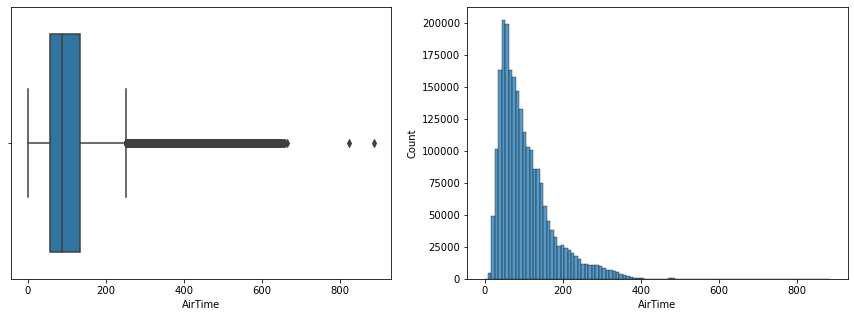

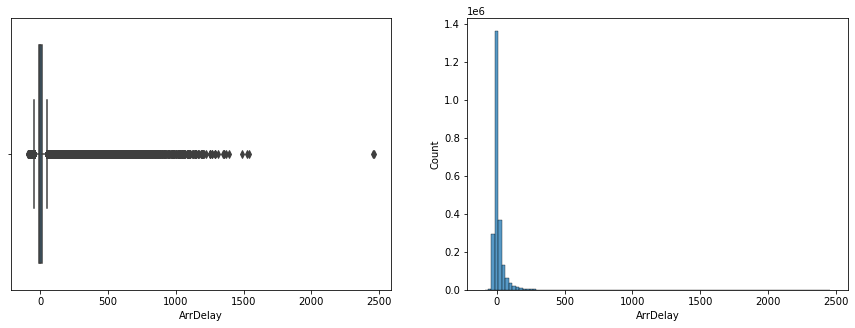

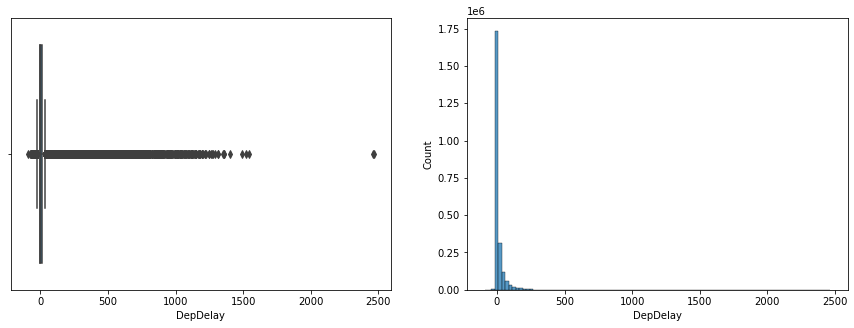

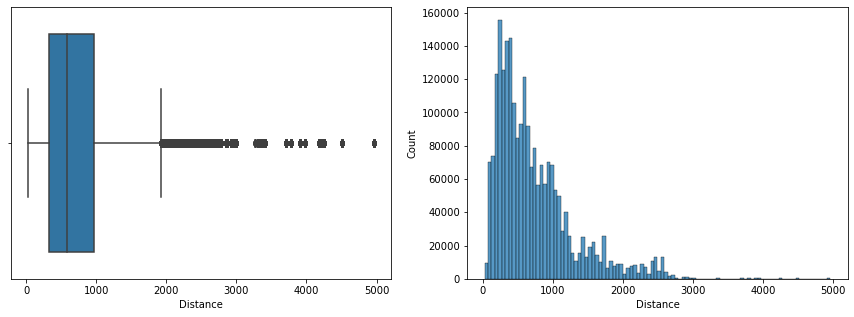

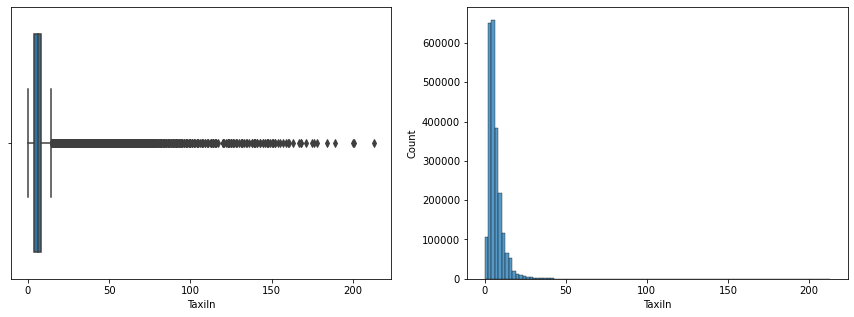

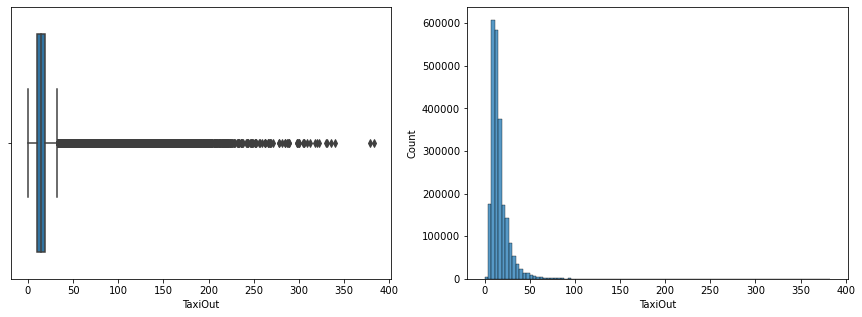

In [16]:
numerical_var = ['AirTime', 'ArrDelay','DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']

# plot loop - TAKES TIME TO RUN
for var in numerical_var:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    # boxplot
    sns.boxplot(data=airlines_notCanceled, ax=ax1, x=var)
    # histogram
    sns.histplot(airlines_notCanceled[var], ax=ax2, bins=100)
    # title

    plt.show()


- The above figures discuss the numerical variables using distribution plots (histogram and box plot). And shows some unique distribution that will reveal relationships between each other.
- There are alot of outlires in all the distributions, We can use `xlim` or `ylim` to exclude the outliers later.

**Let's focus on the distribution of the distance variable**

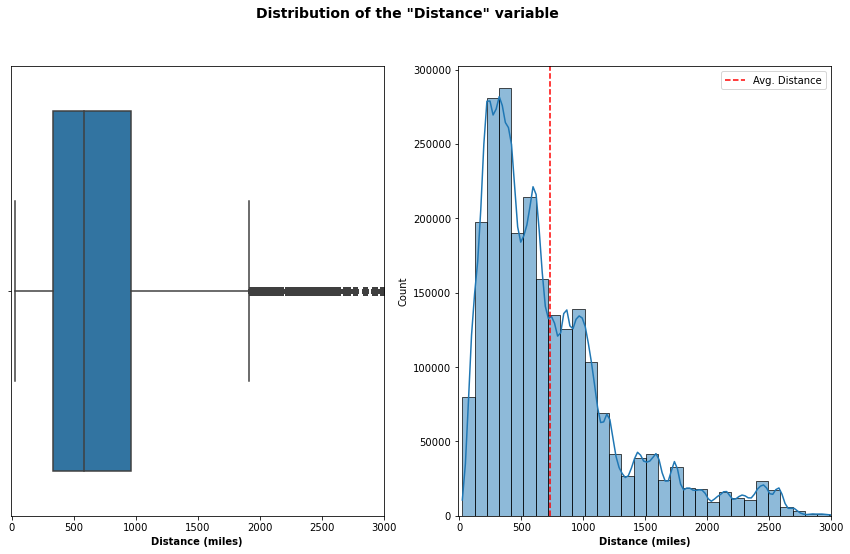

In [17]:
# create subplot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[14.70, 8.27])

# box plot with limit the x axis
g = sns.boxplot(data=airlines_notCanceled, x='Distance', ax=ax1)
g.set(xlim=(-10, 3000))
# set x axis label
g.set_xlabel(xlabel="Distance (miles)", size=10, weight="bold")

# histogram with limit the x axis
g = sns.histplot(data=airlines_notCanceled, x='Distance', ax=ax2, kde=True, bins=50)
g.set(xlim=(-10, 3000))
# set x axis label
g.set_xlabel(xlabel="Distance (miles)", size=10, weight="bold")

# draw mean distance
mean_distance = airlines_notCanceled.Distance.mean()
plt.axvline(x=mean_distance, color='r', linestyle='--', label='Avg. Distance')


# add title
plt.suptitle("Distribution of the \"Distance\" variable", weight='bold', size=14)

plt.legend()
plt.show()

- Obviously, a right-skewed distribution, with a mean value around 750 miles.
- More than 75% of the flights that haven't been canceled were less than 1000 miles in distance.

### Univariate Distribution for Categorical Variables

**Let's first check the ratio of canceled flights and diverted flights.**

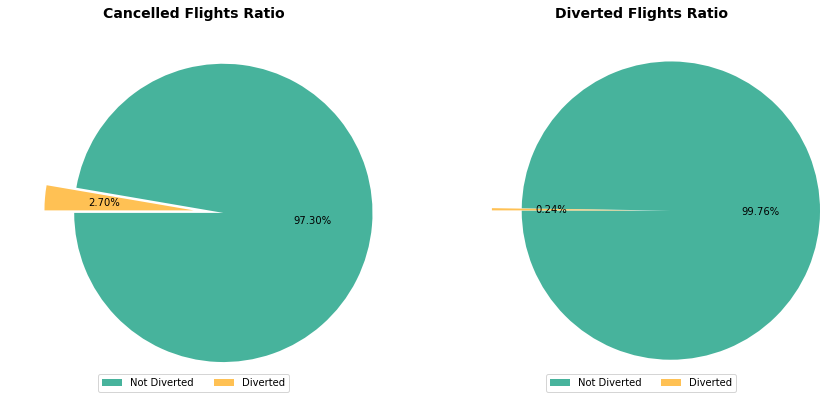

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[14.70, 8.27])

# canceled flights ratio 

# colors
colors = ['#47B39C', '#FFC154'] 

# labels
labels = airlines.Cancelled.value_counts().index.to_list()
# plot 1
ax1.pie(airlines.Cancelled.value_counts(), explode=(0.2, 0), autopct='%.2f%%',
        startangle=180, counterclock=True, colors=colors)

# labels
labels = airlines.Diverted.value_counts().index.to_list()
# plot 2
ax2.pie(airlines.Diverted.value_counts(), explode=(0.2, 0), autopct='%.2f%%',
        startangle=180, counterclock=True, colors=colors, )

# titles
ax1.title.set(text="Cancelled Flights Ratio", weight='bold', size=14);
ax2.title.set(text="Diverted Flights Ratio", weight='bold', size=14);

# legends
ax1.legend(labels, loc=8, ncol=2);
ax2.legend(labels, loc=8, ncol=2);



plt.show()

**From the above two pie charts we discovered that:**
- 2.7% of the flights _(in this data)_ have been canceled.
- Only 0.24% of the flights were diverted.

**Let's dig deeper and check for reasons by plot the bar chart for the reasons.**


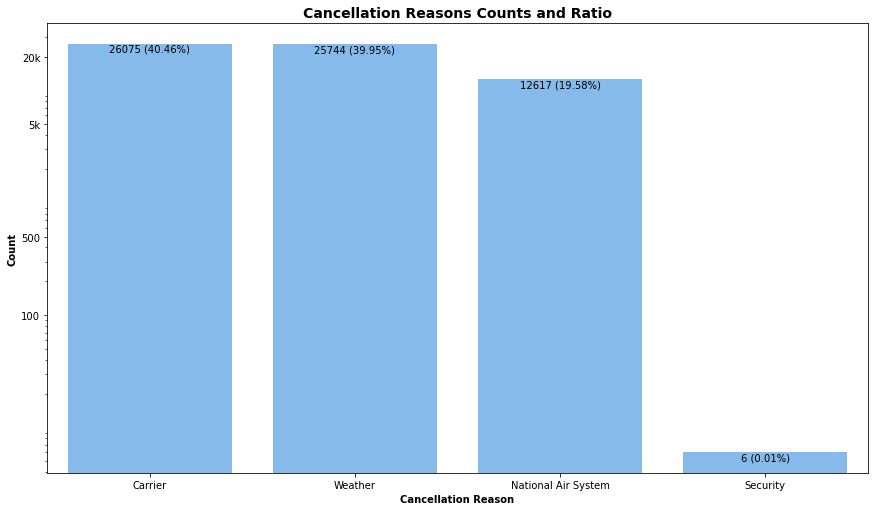

In [19]:
plt.figure(figsize=[14.70, 8.27])

# Plot
base_color = '#74BBFB'
order = airlines_Canceled['CancellationCode'].value_counts().index
g = sns.countplot(data=airlines_Canceled, x='CancellationCode', color=base_color, order=order)

# writing the count and ration over the bars 
for bar in range(airlines_Canceled['CancellationCode'].value_counts().shape[0]):
    count = airlines_Canceled['CancellationCode'].value_counts()[bar]
    pct = (airlines_Canceled['CancellationCode'].value_counts()[bar]/\
    airlines_Canceled['CancellationCode'].shape[0])
    pct = (round(pct, 5)*100).round(2)
    plt.text(x=bar, y=count, s=f"{count} ({pct}%)", va='top', ha='center')

    
# scale y axis and xtics
plt.yscale('log')
plt.yticks([100, 500, 5e3, 2e4], [100, 500, '5k', '20k'])
g.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security'])

# axes labes
plt.xlabel('Cancellation Reason', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")

# title
plt.title('Cancellation Reasons Counts and Ratio', weight='bold', size=14)

plt.show()

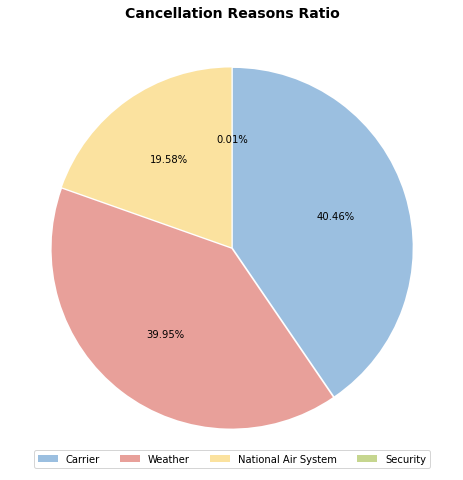

In [20]:
plt.figure(figsize=[14.70, 8.27]);

colors = ['#9BBFE0', '#E8A09A', '#FBE29F', '#C6D68F'] 
labels = ['Carrier', 'Weather', 'National Air System', 'Security']
explode = (0.005, 0.005, 0.005, 0.005)
# plot
plt.pie(airlines_Canceled['CancellationCode'].value_counts(), explode=explode, autopct='%.2f%%',
        startangle=90, counterclock=False, colors=colors, textprops={'color':'black'});

# title
plt.title("Cancellation Reasons Ratio", weight='bold', size=14);
# legend
plt.legend(labels, loc=8, ncol=4);

plt.show()

- From the above, it turns out that most flight cancelation flights were due to carrier and weather reasons with almost 40% each. Followed by National Air System with around 20%. And the security reasons had the least effect.

**Let's ask some time related questions, How many canceled flights per month?**

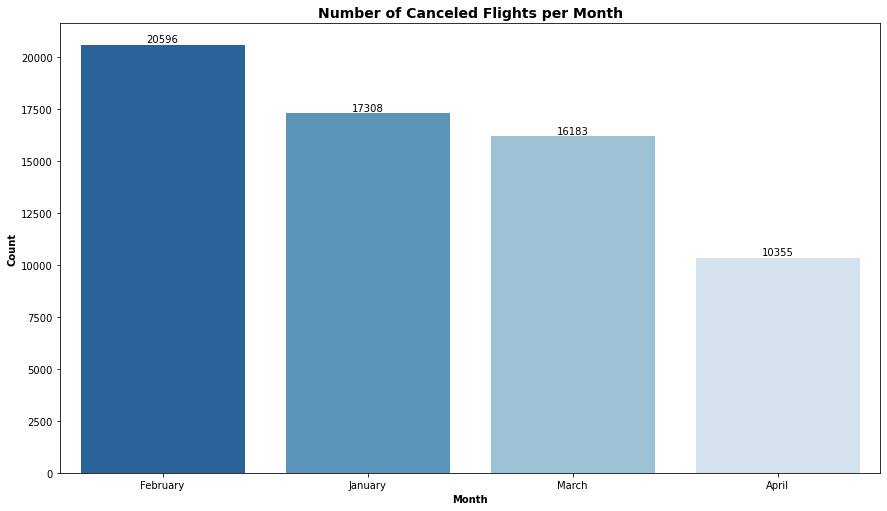

In [21]:
# canceled flights over months
plt.figure(figsize=[14.70, 8.27])

# get the order
order = airlines_Canceled.full_date.dt.month_name().value_counts().index
# plot
sns.countplot(data=airlines_Canceled, x=airlines_Canceled.full_date.dt.month_name(), order=order, palette='Blues_r')

# axes labels and title
plt.xlabel('Month', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights per Month', fontsize = 14, weight = "bold")

# print count on bar
for bar in range(airlines_Canceled.full_date.dt.month_name().value_counts().shape[0]):
    count = airlines_Canceled.full_date.dt.month_name().value_counts()[bar]
    plt.text(x=bar, y=count+500, s=count, va='top', ha='center')

plt.show()

- From the above, the most canceled flights were in February. I think due to the bad weather because it is winter in February.

**And which day had the most canceled flights on?**

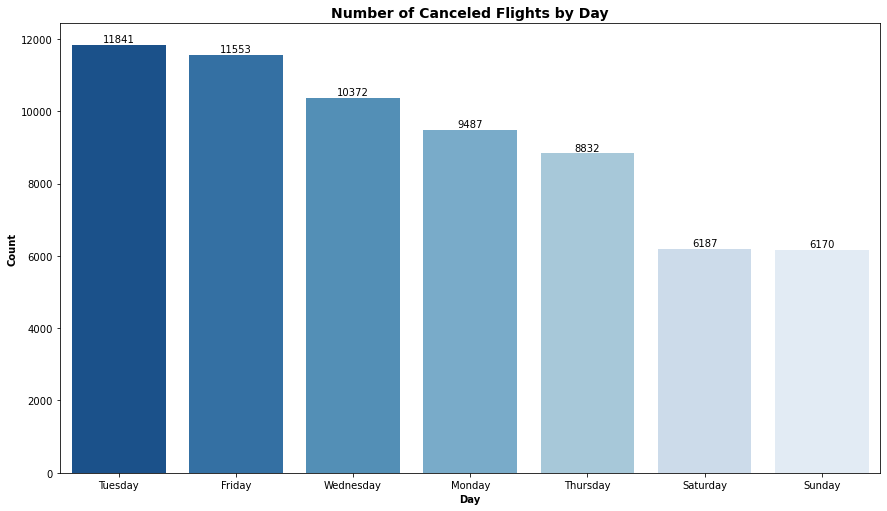

In [22]:
# canceled flights by day

plt.figure(figsize=[14.70, 8.27])

# get the order
order = airlines_Canceled.full_date.dt.day_name().value_counts().index
# plot
sns.countplot(data=airlines_Canceled, x=airlines_Canceled.full_date.dt.day_name(), order=order, palette='Blues_r')


# axes labels and title
plt.xlabel('Day', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights by Day', fontsize = 14, weight = "bold")

# print count on bar
for bar in range(airlines_Canceled.full_date.dt.day_name().value_counts().shape[0]):
    count = airlines_Canceled.full_date.dt.day_name().value_counts()[bar]
    plt.text(x=bar, y=count+300, s=count, va='top', ha='center')

plt.show()

-  Don't travel on Tuesdays of Fridays as the most canceled flights happened on them. Travel on weekends!

**And on what days of the month do most of the cancelations happen?**

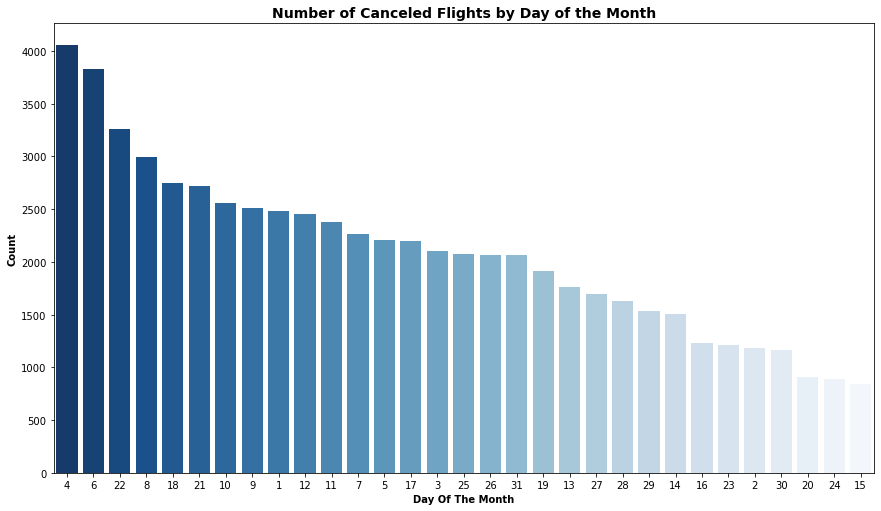

In [23]:
# DayofMonth
plt.figure(figsize=[14.70, 8.27])

# get order
order = airlines_Canceled['DayofMonth'].value_counts().index

# barchart
sns.countplot(data=airlines_Canceled, x='DayofMonth', order=order, palette='Blues_r')

# axes labels and title
plt.xlabel('Day Of The Month', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights by Day of the Month', fontsize = 14, weight = "bold")

plt.show()

- The 4th and the 6th day of the month have the most canceled flights over the month.

**If we have an award for the carrier with the most canceled flights, who will get it?**

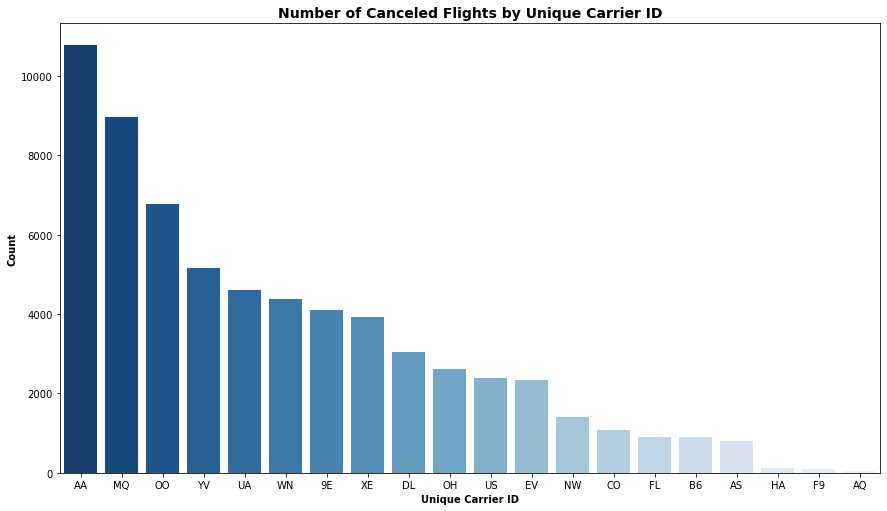

In [24]:
# UniqueCarrier
plt.figure(figsize=[14.70, 8.27])

# get order
order = airlines_Canceled['UniqueCarrier'].value_counts().index

# barchart
sns.countplot(data=airlines_Canceled, x='UniqueCarrier', order=order, palette='Blues_r')

# axes labels and title
plt.xlabel('Unique Carrier ID', fontsize = 10, weight = "bold")
plt.ylabel('Count', fontsize = 10, weight = "bold")
plt.title('Number of Canceled Flights by Unique Carrier ID', fontsize = 14, weight = "bold")

plt.show()

In [25]:
carriers.query('Code == "AA"')

,Code,Description
100,AA,American Airlines Inc.


- And for the reward of the carrier with the most canceled flights goes to American Airlines Inc. with more than 10k canceled flights in the first 4 months of 2008.

## Bivariate Exploration

In this section, we will investigate relationships between pairs of variables in the
data and study the distributions and the most factors.

To start off with, lets look at the pairwise correlations present between features in the data.

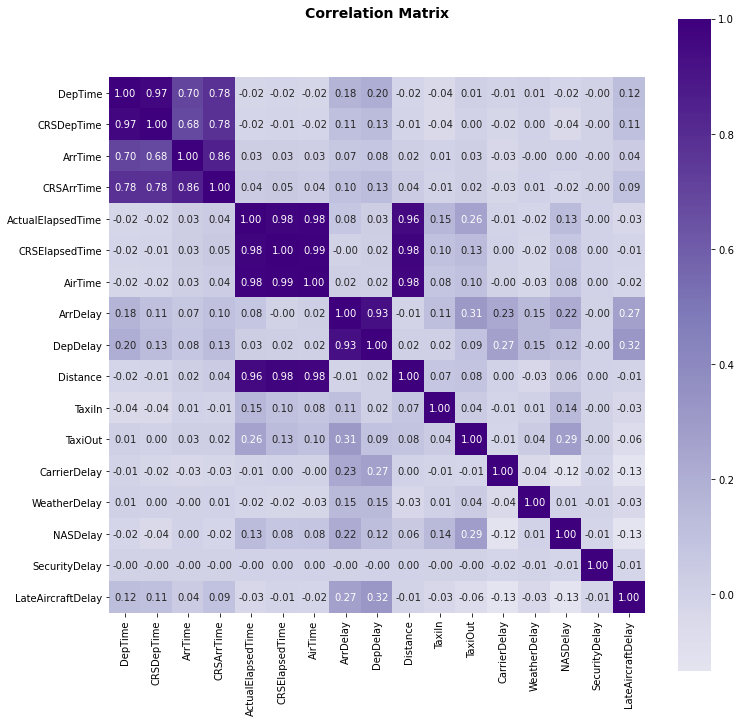

In [26]:
# correlation matrix
plt.figure(figsize=(12, 12))

sns.heatmap(airlines_notCanceled.corr(), square=True, annot=True, fmt='.2f', cmap='Purples', center=.3);

plt.title("Correlation Matrix", size=14, weight="bold", y=1.1)
plt.show()

**Let's check the pair plot**

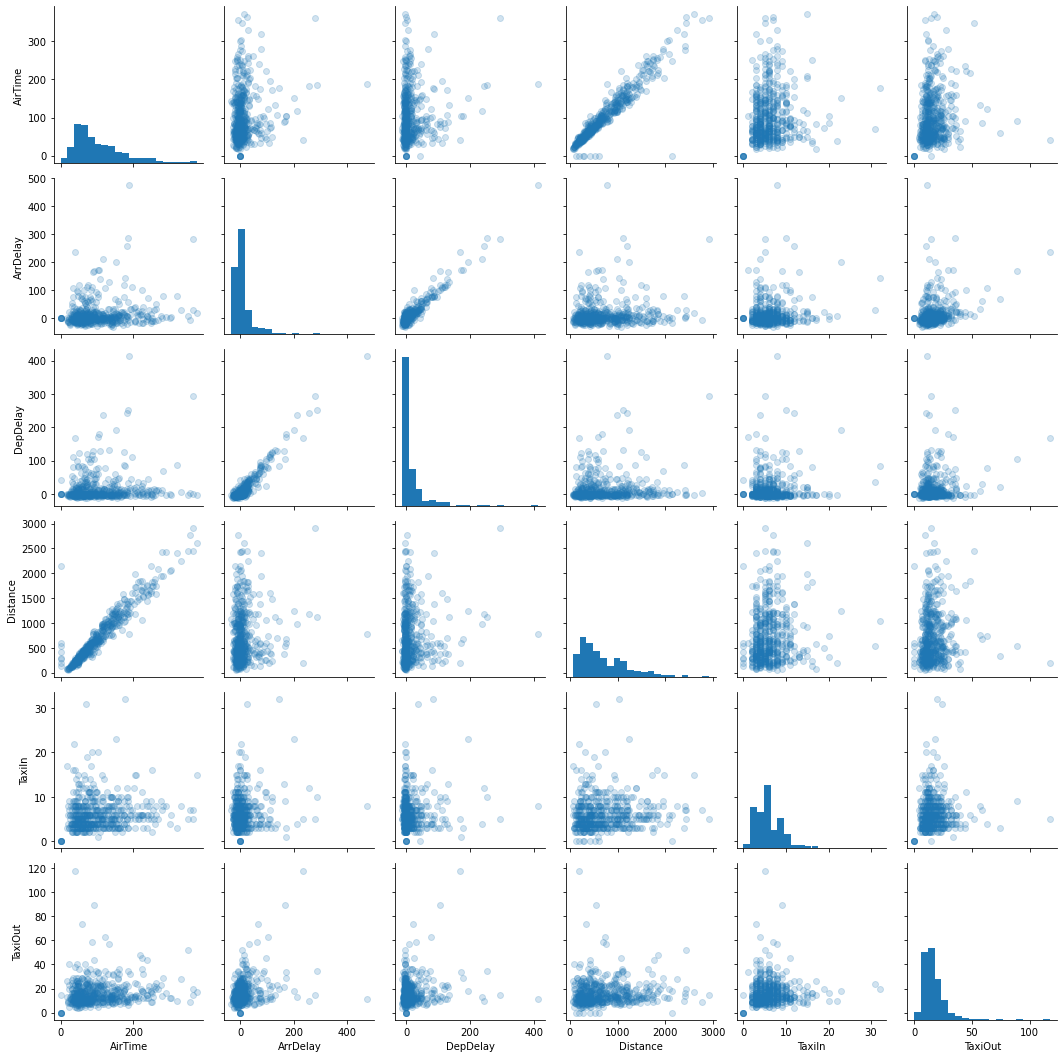

In [27]:
# Pair plot matrix

# work on sample for faster results
samples = np.random.choice(airlines.shape[0], 500, replace=False)
airlines_samp = airlines.loc[samples, :]

# plot
g = sns.PairGrid(data=airlines_samp, vars=numerical_var)
# hist for
g.map_diag(plt.hist, bins=20);
# scatter
g.map_offdiag(plt.scatter, alpha=1/5);

From the above correlation coefficient between each two variables, the following are significant observations:
- Variables such as `Distance` was highly correlated with `ActualElapsedTime`, `CRSElapsedTime`, and `AirTime` (0.95, 0.98 and 0.97).
- Variables such as `ArrDelay` and `DepDelay` were highly highly correlated (0.92) which makes sense because a flight which is delayed on Arrival will most likely leave late and hence be Delayed on Departure.
- Other variables' correlation looks normal.

#### What is the relationship between Arrival delay and the Departure delay?

In [28]:
# we will work on sample for quick render and results
samples = np.random.choice(airlines.shape[0], 200000, replace=False)
airlines_samp = airlines.loc[samples, :]

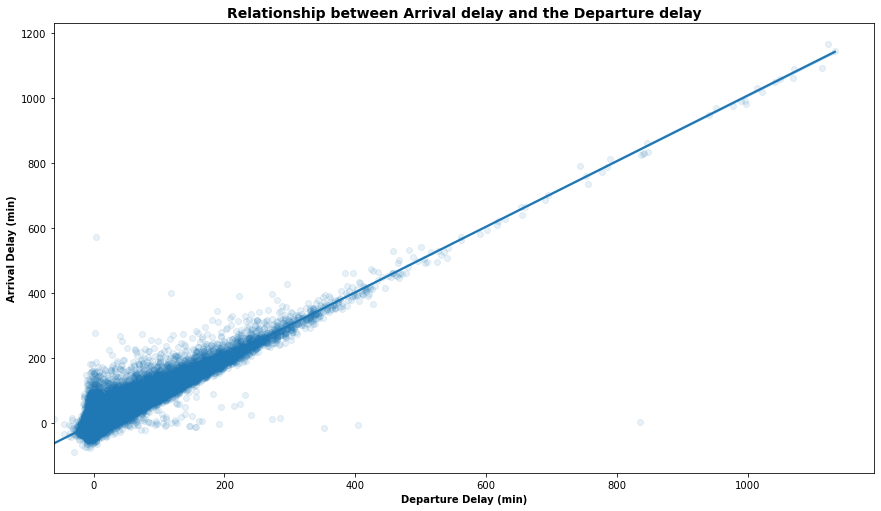

In [29]:
# using scatter plot
plt.figure(figsize=[14.70, 8.27])

sns.regplot(data=airlines_samp, x='DepDelay', y='ArrDelay', fit_reg=True, scatter_kws={'alpha':1/10}, x_jitter=0.03)

# axes labels and title
plt.xlabel('Departure Delay (min)', fontsize = 10, weight = "bold")
plt.ylabel('Arrival Delay (min)', fontsize = 10, weight = "bold")
plt.title('Relationship between Arrival delay and the Departure delay', fontsize = 14, weight = "bold")

plt.show()

- As expected, a positive correlation. If the flight took off late, definitely it will arrive late.

#### And what is the relationship between Distance and Actual Elapsed Time and Air Time 

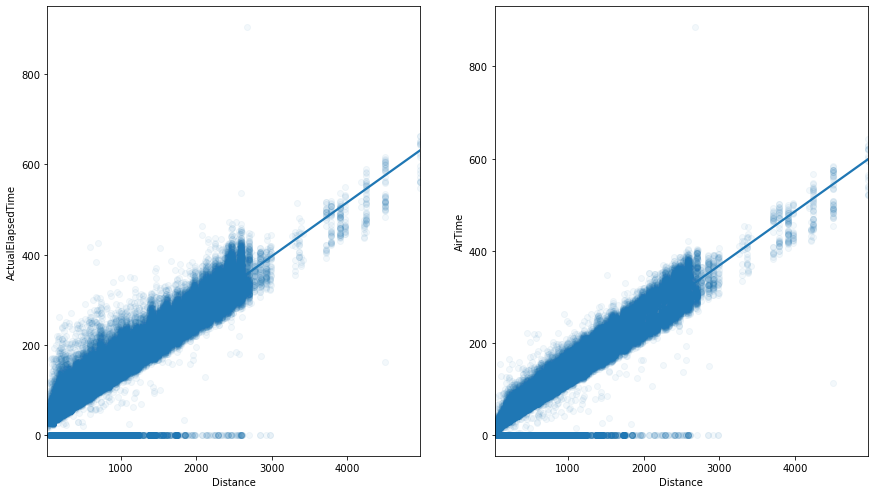

In [30]:
# distance vs Actual Elapsed Time and AirTime
plt.figure(figsize=[14.70, 8.27])

# plot 1
plt.subplot(1, 2, 1)
sns.regplot(data=airlines_samp, x='Distance', y='ActualElapsedTime', scatter_kws={'alpha':1/20}, x_jitter=0.03);


# plot 2
plt.subplot(1, 2, 2)
sns.regplot(data=airlines_samp, x='Distance', y='AirTime', scatter_kws={'alpha':1/20}, x_jitter=0.03);

- Captain Obvious here, When the distance increases both the air time and elapsed time will increase.

#### Let's check the relationship between Distance and Arrival Delay.

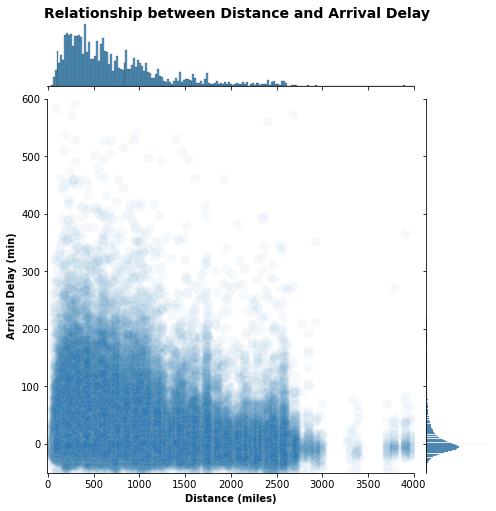

In [31]:
# joint plot with axes limit
g = sns.jointplot(data=airlines_samp, x='Distance', y='ArrDelay', height=7, alpha=1/25,
              s=100, dropna=True, ylim=[-50, 600], xlim=[-5, 4000]);


# axes labels and title
g.set_axis_labels(xlabel='Distance (miles)', ylabel='Arrival Delay (min)', fontsize = 10, weight = "bold");
plt.title('Relationship between Distance and Arrival Delay', fontsize = 14, weight = "bold", y=1.2, x=-3);

plt.show()

- From the above chart and using the correlation matrix _(r = - 0.008)_, It turns out there is a negative relationship between distance and arrival delay as the shorter flights are the most delayed flights on Arrival.

#### Now, let's have a look at the time-related columns.<br>

**So, what is the best hour to book a flight?**

First, we need to convert some columns to answer that question.

In [32]:
def convert2Time(var):
    """ Convert records to proper time format """
    try:
        if var != 0 or var != np.NAN:
            if str(int(var))[:-2].zfill(2) == '24':
                hh = '00'
            else:
                hh = str(int(var))[:-2].zfill(2)
            
            mm = str(int(var))[-2:].zfill(2)
            time = f"{hh}:{mm}"
        return time
    except Exception as e:
        pass

In [33]:
# work on a copy
airlines_copy = airlines.copy()

In [34]:
# Extract/Convert time
airlines_copy['DepTime'] = airlines_copy['DepTime'].apply(convert2Time)
airlines_copy['CRSDepTime'] = airlines_copy['CRSDepTime'].apply(convert2Time)
airlines_copy['ArrTime'] = airlines_copy['ArrTime'].apply(convert2Time)
airlines_copy['CRSArrTime'] = airlines_copy['CRSArrTime'].apply(convert2Time)

airlines_copy[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,13:43,13:25,14:51,14:35
1,11:25,11:20,12:47,12:45
2,20:09,20:15,21:36,21:40
3,09:03,08:55,12:03,12:05
4,14:23,14:00,17:26,17:10


In [35]:
# Extract the hour
airlines_copy['DepHour'] = airlines_copy['DepTime'].apply(lambda x: x[:2])
airlines_copy['ArrHour'] = airlines_copy['ArrTime'].apply(lambda x: x[:2])

airlines_copy[['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'DepHour', 'ArrHour']].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,DepHour,ArrHour
0,13:43,13:25,14:51,14:35,13,14
1,11:25,11:20,12:47,12:45,11,12
2,20:09,20:15,21:36,21:40,20,21
3,09:03,08:55,12:03,12:05,09,12
4,14:23,14:00,17:26,17:10,14,17


**Let's plot the distribution of delay over the hours day compared to:**
1. Departure hour.
2. Scheduled departure hour.

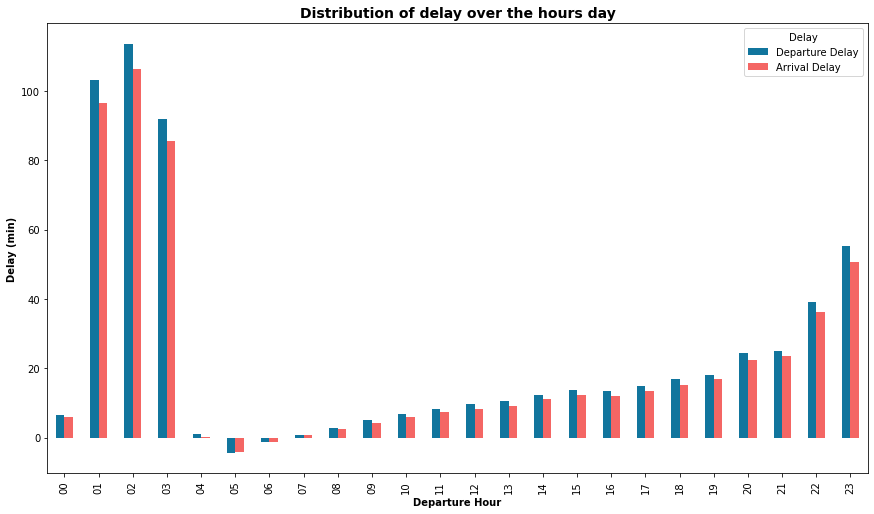

In [36]:
colors = ['#11759D', '#F46664']

# plot 
barlist = airlines_copy.groupby('DepHour')[['DepDelay','ArrDelay']].mean().plot.bar(
    figsize=[14.70, 8.27], color=colors)

# title, lables & legend
plt.title("Distribution of delay over the hours day", fontsize = 14, weight = "bold")
plt.ylabel('Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Departure Hour', fontsize = 10, weight = "bold")

plt.legend(['Departure Delay', 'Arrival Delay'], title="Delay")
plt.show()

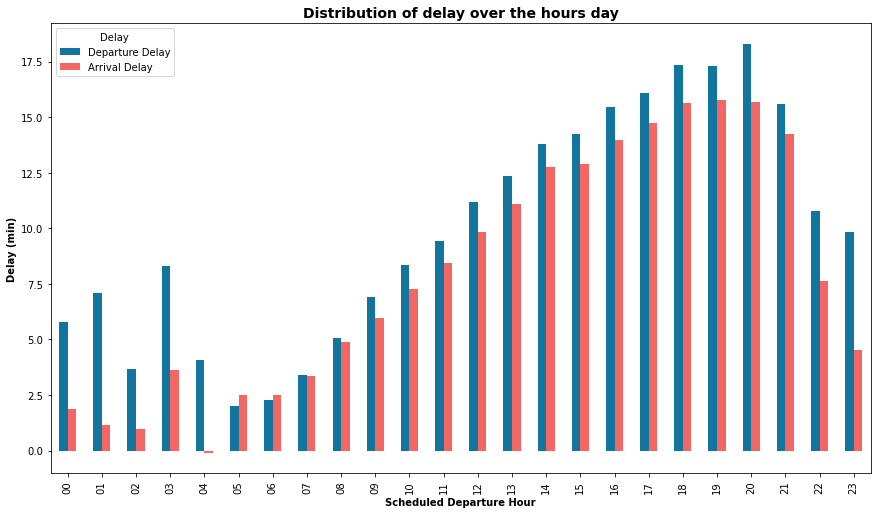

In [37]:
# Extract the hour
airlines_copy['CRSDepHour'] = airlines_copy['CRSDepTime'].apply(lambda x: x[:2])

# plot
airlines_copy.groupby('CRSDepHour')[['DepDelay','ArrDelay']].mean().plot.bar(
    figsize=[14.70, 8.27], color=colors)
                                                                
# title, lables & legend
plt.title("Distribution of delay over the hours day", fontsize = 14, weight = "bold")
plt.ylabel('Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Scheduled Departure Hour', fontsize = 10, weight = "bold")

plt.legend(['Departure Delay', 'Arrival Delay'], title="Delay")
plt.show()

- From the above, we can confirm the early hours of the day _(04:00 AM to 07:00 AM)_ are the best hours to book a flight as they have the least delays.

**And What if we have an award for the carrier with the most delayed flights, who will get it?**

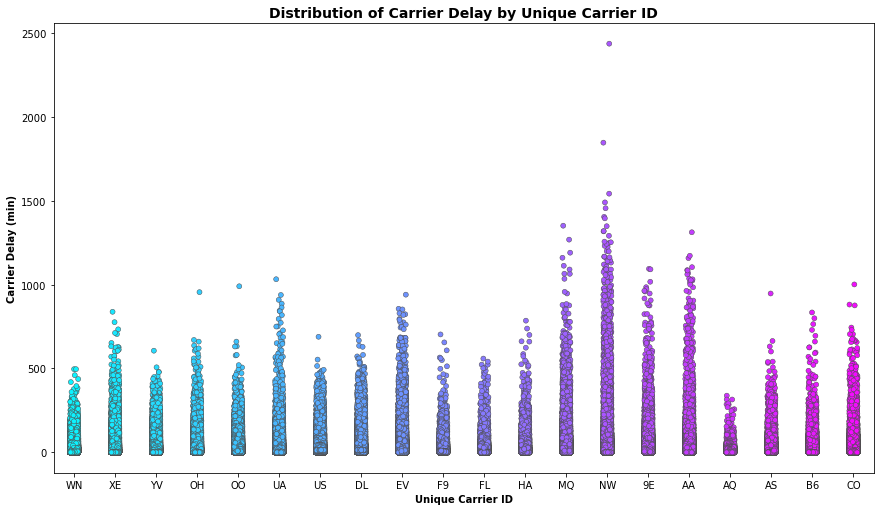

In [38]:
plt.figure(figsize=[14.70, 8.27])
# plot
sns.stripplot(data=airlines_notCanceled, x="UniqueCarrier", y="CarrierDelay",
              dodge=True, linewidth=0.5, palette='cool');

# title, lables & legend
plt.title("Distribution of Carrier Delay by Unique Carrier ID", fontsize = 14, weight = "bold")
plt.ylabel('Carrier Delay (min)', fontsize = 10, weight = "bold")
plt.xlabel('Unique Carrier ID', fontsize = 10, weight = "bold")

plt.show()

- The Northwest Airlines Inc. (NW) had the most delayed flights due to carrier delay, followed by American Eagle Airlines Inc. (MQ) and American Airlines Inc. (AA).

## Multivariate Exploration

We will create plots of three or more variables to investigate the data even
further.

#### What is the relationship between Dep. delay and Arr. delay for each unique carrier?

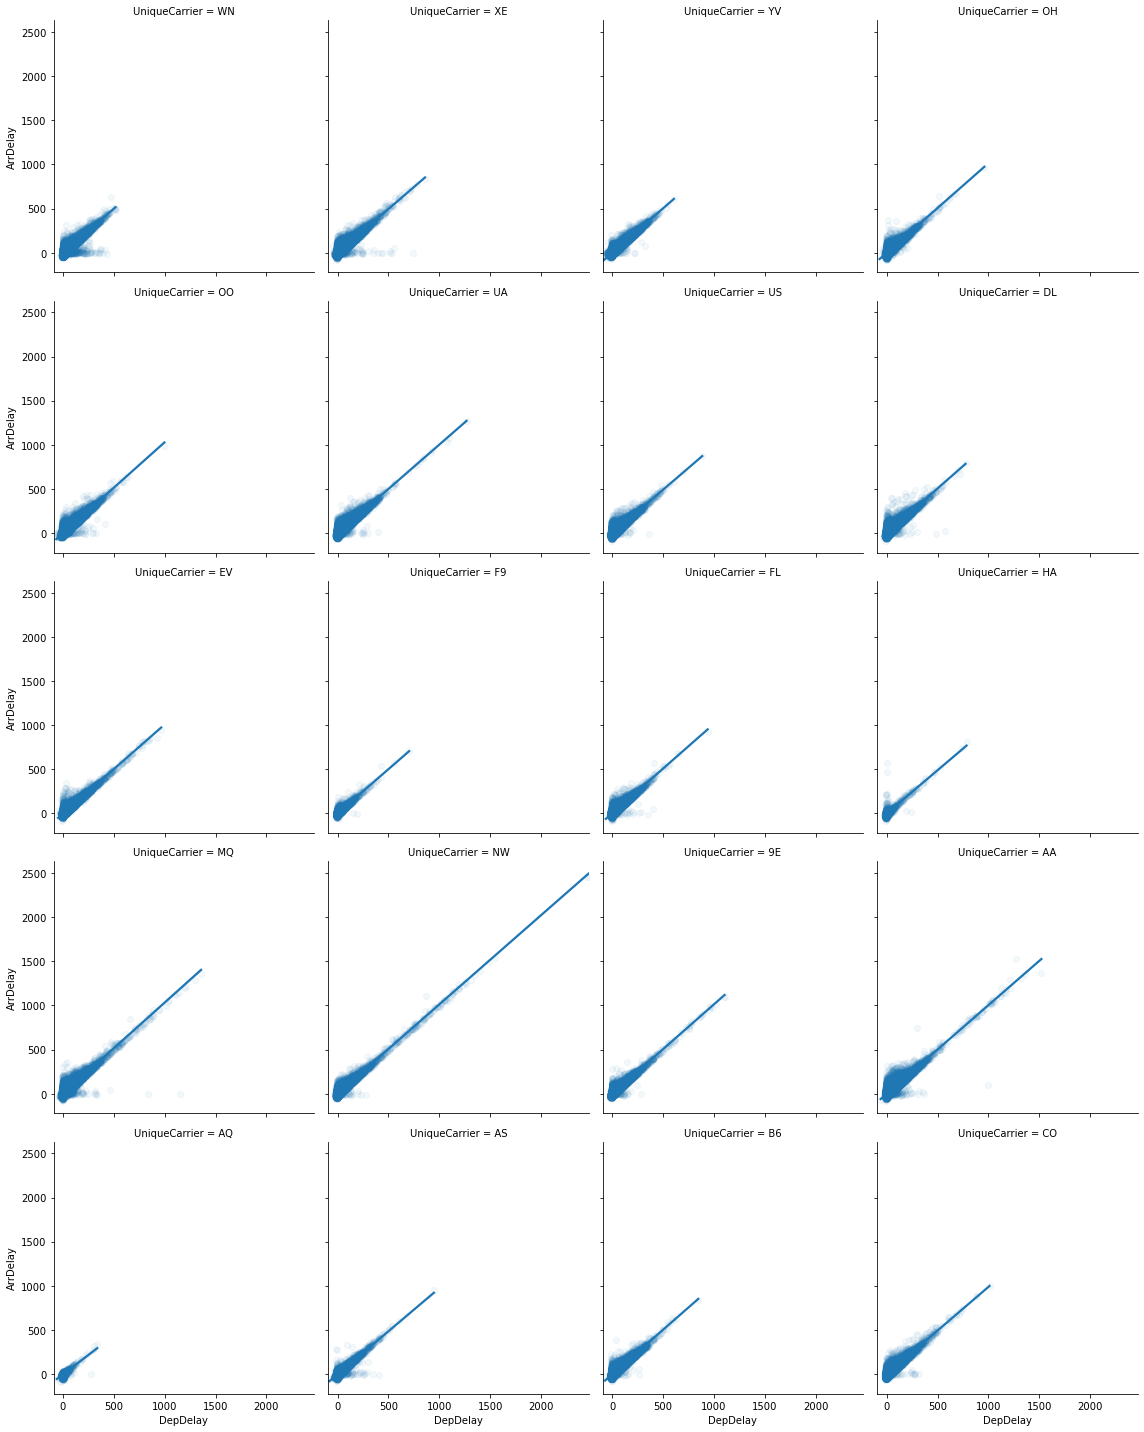

In [39]:
g = sns.FacetGrid(data=airlines_notCanceled, col='UniqueCarrier', col_wrap=4, height=4)
g.map(sns.regplot, 'DepDelay', 'ArrDelay', scatter_kws={'alpha':1/20})

plt.show()

#### Let's focus and investigate more about Northwest Airlines Inc., American Airlines Inc. and American Eagle Airlines Inc. 

In [40]:
subset = airlines.query('(UniqueCarrier == "NW") | (UniqueCarrier == "AA") | (UniqueCarrier == "MQ")')

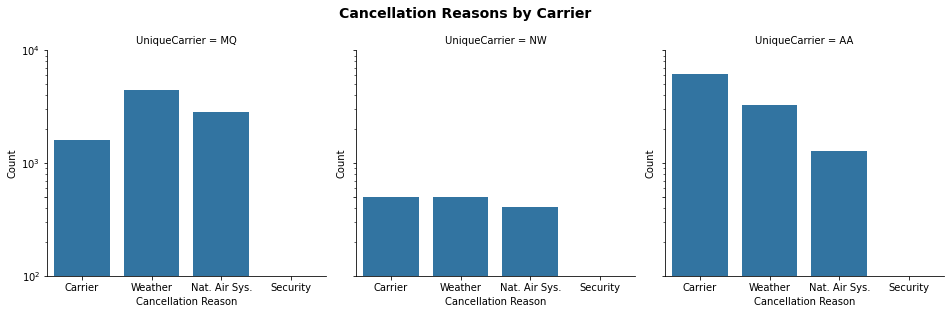

In [41]:
# getting order
order = subset['CancellationCode'].value_counts().index

# plotting
g = sns.FacetGrid(data=subset, col='UniqueCarrier', col_wrap=4, height=4.4)
g.map(sns.countplot, 'CancellationCode', order=order);

# apply scale log on y axis
g.set(yscale='log')

# fix ticks
g.set(yticks=[100, 500, 1000, 10000])
g.set(xticklabels=['Carrier', 'Weather', 'Nat. Air Sys.', 'Security'])

# axis label and title
g.set(xlabel='Cancellation Reason', ylabel='Count')
plt.suptitle('Cancellation Reasons by Carrier', fontsize = 14, weight = "bold", x=0.37)

plt.tight_layout();
plt.show()

- As with all carriers, American Airlines Inc. and Northwest Airlines Inc. their canceled flights happened due to carrier and weather reasons. on the other hand, American Eagle Airlines Inc.'s most of its canceled flights happened due to weather reasons.

**Let's check the relationship between arrival delay and distance for these carriers**

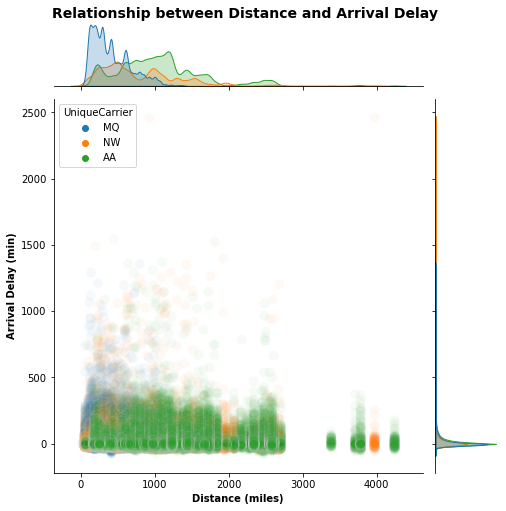

In [42]:
# joint plot with axes limit
g = sns.jointplot(data=subset, y='ArrDelay', x='Distance', height=7, alpha=1/25, s=100,
            dropna=True, hue='UniqueCarrier')

# ylim=[-50, 1000], xlim=[-5, 1000]
# axes labels and title
g.set_axis_labels(xlabel='Distance (miles)', ylabel='Arrival Delay (min)', fontsize = 10, weight = "bold")
plt.title('Relationship between Distance and Arrival Delay', fontsize = 14, weight = "bold", y=1.2, x=-3)

plt.show()

- That match what we have found before, but for American Eagle Airlines Inc.'s shortest flights arrived more later than the longest ones than the other carriers

---

### Conclusion:
From the above findings, and after investigating and  plotting the correlation matrix between the variables, we deduced That: 
- Most of the flights not diverted (only 0.24%).
- The most cancellation flights were due to the carrier and weather reasons. 
- Northwest Airlines Inc. followed by American Airlines Inc. has the most delayed flights and American Airlines Inc. has the most canceled ones.
- We have found a negative correlation between the distance and the arrival delay, in which we observed that the shortest flights in distance are the most delayed on arrival.
- And if you want my advice on when to book your flight? from the above charts it turns out the early hours of the morning have the least delays over the hours of the day.
